Importing the Libraries

In [1]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

Looading The Data

In [2]:
x=np.load("/content/X.npy")
y=np.load("/content/Y.npy")

Data Exploration

In [3]:
print(x)

[[[[226 164 206]
   [224 154 196]
   [225 175 211]
   ...
   [240 221 237]
   [232 184 214]
   [243 213 235]]

  [[217 142 188]
   [221 130 179]
   [224 150 196]
   ...
   [227 170 204]
   [229 180 215]
   [236 212 232]]

  [[237 178 212]
   [229 157 199]
   [218 125 175]
   ...
   [221 184 217]
   [190 153 193]
   [227 164 208]]

  ...

  [[217 145 192]
   [214 129 184]
   [212 129 183]
   ...
   [194 122 185]
   [204 143 193]
   [189 129 188]]

  [[218 144 192]
   [213 128 185]
   [208 121 171]
   ...
   [136  79 145]
   [184 111 174]
   [188 112 176]]

  [[212 125 181]
   [211 136 181]
   [220 162 206]
   ...
   [127  90 152]
   [213 167 202]
   [215 180 211]]]


 [[[219 150 197]
   [217 158 201]
   [228 173 205]
   ...
   [198 165 199]
   [230 204 224]
   [231 193 221]]

  [[223 150 195]
   [222 140 192]
   [213 133 186]
   ...
   [218 143 193]
   [218 148 197]
   [215 131 185]]

  [[203 125 176]
   [218 143 192]
   [227 163 199]
   ...
   [210 137 188]
   [203 121 177]
   [192 124

In [4]:
print(y)

[0 0 0 ... 1 1 1]


In [5]:
# Printing Shape of X and Y
print(x.shape)
print(y.shape)

(5547, 50, 50, 3)
(5547,)


In [6]:
# Counting the Number of Images for both Classes i.e., 0 and 1
print('No of Negative Images:', len(x[y==0])) # images with label 0 = Non-IDC, Negative Images
print('No of Positive Images:', len(x[y==1])) # images with label 1 = IDC, Positive Images

No of Negative Images: 2759
No of Positive Images: 2788


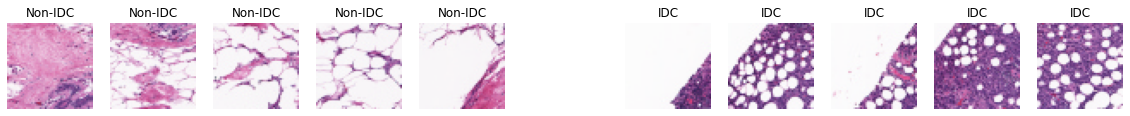

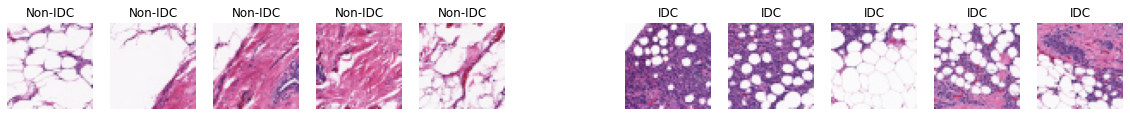

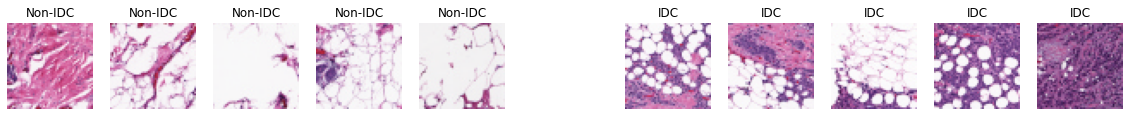

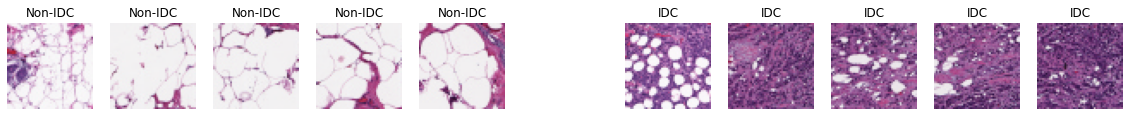

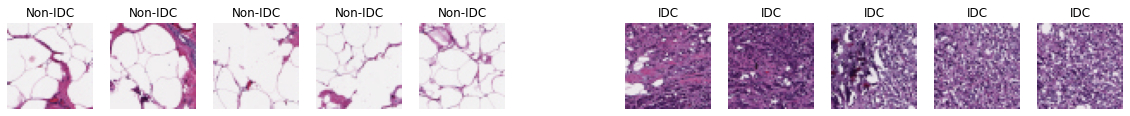

In [7]:
# Looking at some images

img0 = x[y==0] # Non-IDC, negative image
img1 = x[y==1] # IDC, positive image

batch = 0 # Each batch plot 25 Non-IDC images on the left and 25 IDC images on the right

for row in range(5):
    plt.figure(figsize=(20,10))
    for col in range(5):
        plt.subplot(1,11,col+1)
        plt.imshow(img0[9*batch + 3*row+col])
        plt.axis('off')
        plt.title('Non-IDC')
        
        plt.subplot(1,11,col+7)
        plt.imshow(img1[9*batch + 3*row+col])
        plt.axis('off')
        plt.title('IDC')

Data Pre-Processing

In [8]:
# Converting Y to 2D Array
y = np.array(y)
y = to_categorical(y)
print(y.shape)

(5547, 2)


In [9]:
# Changing Image Pixel To 64*64
x = resize(x, (5547, 64, 64, 3))
# x = resize(x, (5547, 32, 32, 3))

print(x.shape)
x

(5547, 64, 64, 3)


array([[[[0.88183785, 0.62931794, 0.79588025],
         [0.8788737 , 0.60677658, 0.77406269],
         [0.87931028, 0.63074927, 0.78837891],
         ...,
         [0.92078929, 0.7764658 , 0.87390663],
         [0.92210861, 0.75759134, 0.86610371],
         [0.94540824, 0.82228573, 0.91146216]],

        [[0.86343252, 0.58030599, 0.75641563],
         [0.86791322, 0.55528301, 0.73583889],
         [0.87469171, 0.57680856, 0.75287799],
         ...,
         [0.90417624, 0.72066387, 0.84212814],
         [0.91259574, 0.75093922, 0.86541437],
         [0.93093214, 0.81935604, 0.90580959]],

        [[0.88590303, 0.61393708, 0.77526425],
         [0.88273208, 0.57847063, 0.75141314],
         [0.87494064, 0.55145144, 0.73469573],
         ...,
         [0.85175494, 0.6731474 , 0.81267904],
         [0.85523706, 0.68683651, 0.82475299],
         [0.90066445, 0.7364344 , 0.86025391]],

        ...,

        [[0.8513691 , 0.5596201 , 0.74974437],
         [0.84233877, 0.52432598, 0.73330365]

In [10]:
# Splitting Data into Training And Testing Set
seed = 1234
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Building Models

In [11]:
# Model-2
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(filters=256,kernel_size=(3,3), activation = 'relu'))
model2.add(Conv2D(filters=256,kernel_size=(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=512,kernel_size=(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(2, activation='sigmoid')) 

model2.compile(optimizer=tf.keras.optimizers.Adam(0.000005),
             loss='binary_crossentropy',
             metrics=['accuracy'])
print(model2.summary())

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 54, 54, 256)       590080    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 256)      0         
 )                                                               
                                                        

In [12]:
# test the classifier model:
preds=model2.predict(X_test)
preds

array([[0.76801157, 0.24130152],
       [0.20290835, 0.8026069 ],
       [0.5614087 , 0.4356271 ],
       ...,
       [0.32654718, 0.66324943],
       [0.11382664, 0.8896676 ],
       [0.08171489, 0.91751486]], dtype=float32)

In [13]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[411 155]
 [122 422]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       566
           1       0.73      0.78      0.75       544

    accuracy                           0.75      1110
   macro avg       0.75      0.75      0.75      1110
weighted avg       0.75      0.75      0.75      1110



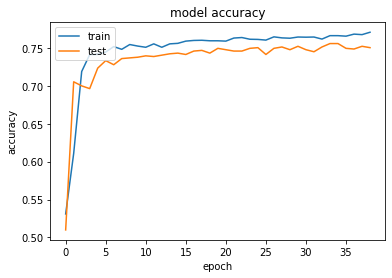

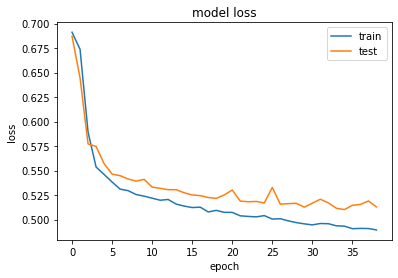

In [14]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

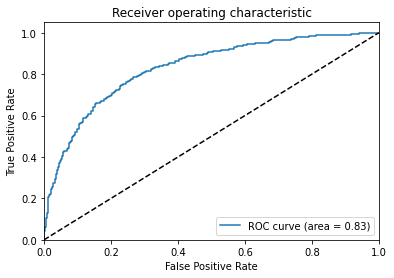

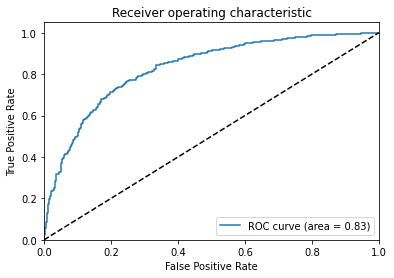

In [15]:
# Compute ROC curve and ROC area for each class

y_score = model2.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
# Model-4
model4 = Sequential() 

model4.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same', input_shape = (64,64,3)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.20))
model4.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model4.add(Dropout(0.25))
model4.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(512,(3,3), activation = 'relu', padding = 'same'))
model4.add(Dropout(0.25))
model4.add(Conv2D(1024,(3,3), activation = 'relu', padding = 'same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(2, activation = 'sigmoid'))


model4.summary()
model4.compile(loss='binary_crossentropy', optimizer ='RMSprop', metrics=['accuracy'])

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[callback])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 256)       295168    
                                                      

In [17]:
# test the classifier model:
preds=model4.predict(X_test)
preds

array([[0.37812126, 0.616792  ],
       [0.12779768, 0.87218815],
       [0.39385366, 0.6049992 ],
       ...,
       [0.12660432, 0.87220573],
       [0.10988078, 0.8914451 ],
       [0.04626908, 0.9534639 ]], dtype=float32)

In [18]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[314 252]
 [ 52 492]]
              precision    recall  f1-score   support

           0       0.86      0.55      0.67       566
           1       0.66      0.90      0.76       544

    accuracy                           0.73      1110
   macro avg       0.76      0.73      0.72      1110
weighted avg       0.76      0.73      0.72      1110



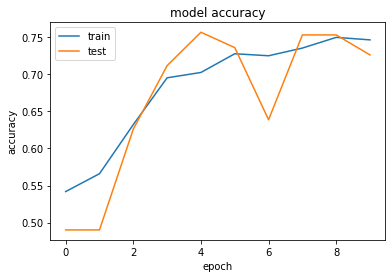

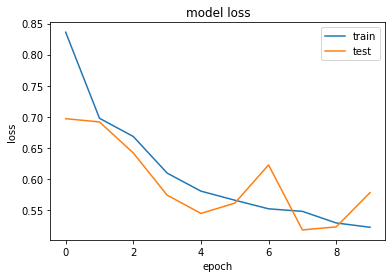

In [19]:
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

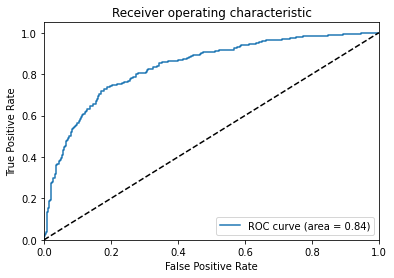

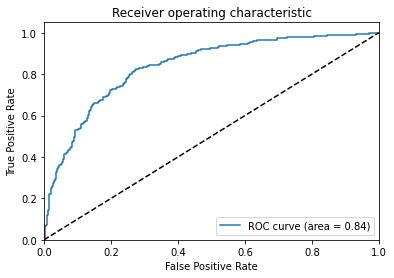

In [20]:
# Compute ROC curve and ROC area for each class

y_score = model4.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Fine-Tuned Models

In [21]:
#  Model-5
model5 = Sequential()
model5.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same', input_shape = (64,64,3)))
model5.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model5.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(512, activation = 'relu'))
model5.add(Dropout(0.5))
model5.add(Dense(2, activation = 'softmax'))


model5.compile(optimizer='adam',
             loss= "binary_crossentropy",
             metrics=['accuracy'])
print(model5.summary())

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
history5 = model5.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose = 1, callbacks=[callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        36928     
                                                      

In [22]:
# test the classifier model:
preds=model5.predict(X_test)
preds

array([[0.98798484, 0.0120151 ],
       [0.06726677, 0.93273324],
       [0.65147537, 0.34852463],
       ...,
       [0.13907704, 0.860923  ],
       [0.08902612, 0.91097385],
       [0.02185649, 0.9781436 ]], dtype=float32)

In [23]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[393 173]
 [ 96 448]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.75       566
           1       0.72      0.82      0.77       544

    accuracy                           0.76      1110
   macro avg       0.76      0.76      0.76      1110
weighted avg       0.76      0.76      0.76      1110



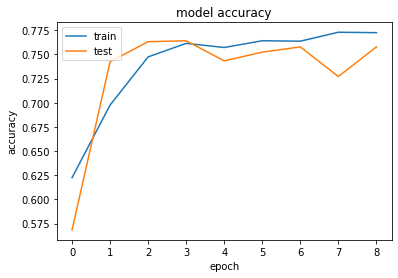

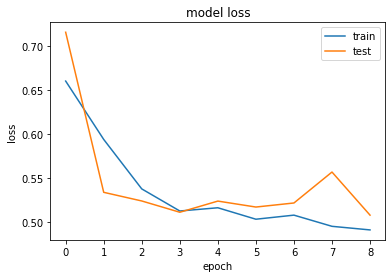

In [24]:
# import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

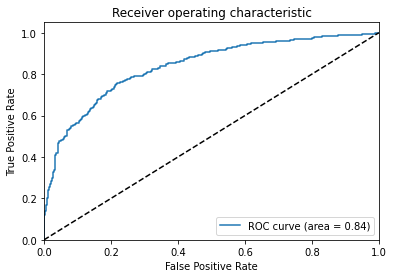

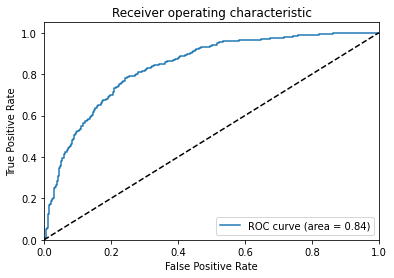

In [25]:
# Compute ROC curve and ROC area for each class

y_score = model5.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [26]:
# Model-9
model9 = Sequential() 

model9.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same', input_shape = (64,64,3)))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.20))
model9.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model9.add(Dropout(0.25))
model9.add(Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.25))
model9.add(Conv2D(512,(3,3), activation = 'relu', padding = 'same'))
model9.add(Dropout(0.25))
model9.add(Conv2D(1024,(3,3), activation = 'relu', padding = 'same'))
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Flatten())
model9.add(Dense(2, activation = 'softmax'))


model9.summary()
model9.compile(loss='binary_crossentropy', optimizer ='RMSprop', metrics=['accuracy'])

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
history9 = model9.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 256)       295168    
                                                      

In [27]:
# test the classifier model:
preds=model9.predict(X_test)
preds

array([[0.9975625 , 0.0024375 ],
       [0.4938394 , 0.5061606 ],
       [0.98917794, 0.01082206],
       ...,
       [0.8387921 , 0.16120793],
       [0.68340135, 0.31659862],
       [0.01765275, 0.98234725]], dtype=float32)

In [28]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[498  68]
 [237 307]]
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       566
           1       0.82      0.56      0.67       544

    accuracy                           0.73      1110
   macro avg       0.75      0.72      0.72      1110
weighted avg       0.75      0.73      0.72      1110



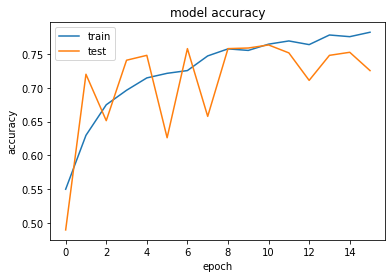

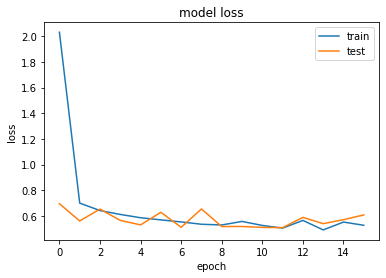

In [29]:
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

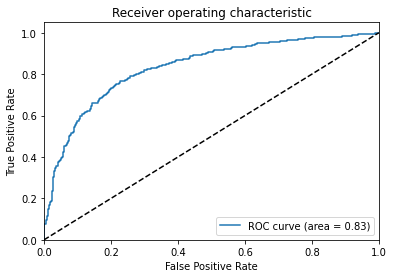

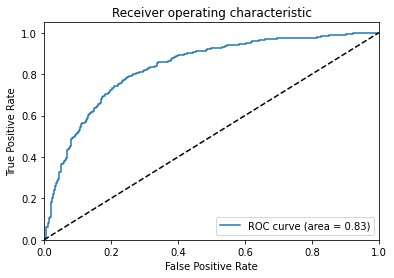

In [30]:
# Compute ROC curve and ROC area for each class

y_score = model9.predict(X_test) # get the prediction probabilities

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(2):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Pre-Trained Models

In [31]:
EfficientNetB7=tf.keras.applications.efficientnet.EfficientNetB7(input_shape=(64,64,3),
                                               include_top=False,
                                               weights='imagenet')
mod1=EfficientNetB7.output
mod1=tf.keras.layers.Flatten()(mod1)
mod1=tf.keras.layers.Dense(units=512, activation=tf.nn.relu)(mod1)
output1=tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)(mod1)
model= tf.keras.models.Model(inputs=EfficientNetB7.inputs,outputs=output1)

model.compile(optimizer=tf.keras.optimizers.Adam(0.0005),
             loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
             metrics=['accuracy'])
model.summary()

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[callback])

258088960/258076736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 64, 64, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 64, 64, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 65, 65, 3)    0           ['normalization[0][0]']          
                           

In [32]:
# test the classifier model:
preds=model.predict(X_test)
preds

array([[0.05724655, 0.94275343],
       [0.6598962 , 0.34010378],
       [0.01580467, 0.98419535],
       ...,
       [0.05901439, 0.94098556],
       [0.10620005, 0.8938    ],
       [0.585201  , 0.41479897]], dtype=float32)

In [33]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[198 368]
 [138 406]]
              precision    recall  f1-score   support

           0       0.59      0.35      0.44       566
           1       0.52      0.75      0.62       544

    accuracy                           0.54      1110
   macro avg       0.56      0.55      0.53      1110
weighted avg       0.56      0.54      0.53      1110



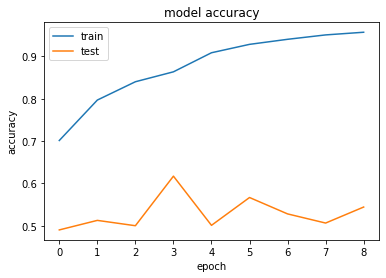

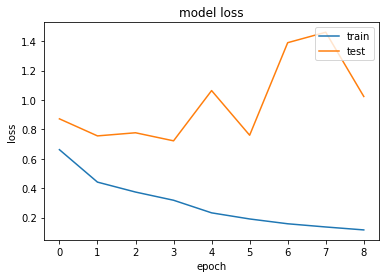

In [34]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [35]:
RestNet50=tf.keras.applications.resnet.ResNet50(input_shape=(64,64,3),
                                               include_top=False,
                                               weights='imagenet')
mod1=RestNet50.output
mod1=tf.keras.layers.Flatten()(mod1)
mod1=tf.keras.layers.Dense(units=256, activation=tf.nn.relu)(mod1)
output1=tf.keras.layers.Dense(units=2, activation=tf.nn.sigmoid)(mod1)
model10= tf.keras.models.Model(inputs=RestNet50.inputs,outputs=output1)

model10.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
             metrics=['accuracy'])
model10.summary()

callback = EarlyStopping(monitor='val_accuracy', patience=5)

seed = 1234
np.random.seed(seed)
hist10 = model10.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[callback])


94781440/94765736 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                           

In [36]:
# test the classifier model:
preds=model10.predict(X_test)
preds

array([[0.8760093 , 0.11721327],
       [0.04025989, 0.96268755],
       [0.9174674 , 0.08125699],
       ...,
       [0.95347226, 0.04502394],
       [0.8474221 , 0.15544905],
       [0.02482027, 0.97943306]], dtype=float32)

In [37]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(preds,axis=1)
print(confusion_matrix(y_test_arg, Y_pred))
print(classification_report(y_test_arg, Y_pred))

[[498  68]
 [241 303]]
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       566
           1       0.82      0.56      0.66       544

    accuracy                           0.72      1110
   macro avg       0.75      0.72      0.71      1110
weighted avg       0.74      0.72      0.71      1110



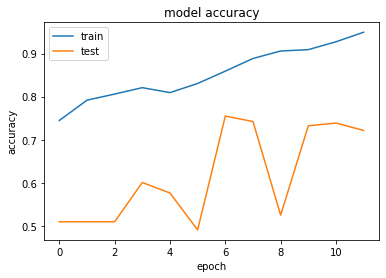

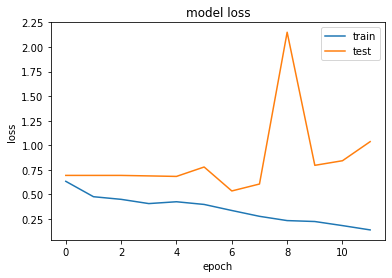

In [38]:
plt.plot(hist10.history['accuracy'])
plt.plot(hist10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist10.history['loss'])
plt.plot(hist10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()